In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [3]:
plt.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams.update({'font.size': 10})
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 12;
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = 10;
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2;
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5;
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1;
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in';
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
params = {'mathtext.default': 'regular'}
plt.rcParams.update(params)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.right']=True
plt.rcParams['xtick.top']=True

In [4]:
data=pd.read_csv('Documents/Python.csv')

In [5]:
radio=data['Radio Flux (Jy)']
radioerg=radio*1e-23
D=data['Distance (Mpc)']
babykflux=np.array([385e-3,2.3e-3])*1e-23
babykD=np.array([15.1,12])

In [6]:
def jet_power(Di,radio):
    dist=Di*3.0846e24
    H0=70
    c=3e5
    z=(H0*Di)/c
    v0=1.4e9
    alph=0.8
    rpower=4*math.pi*(dist**2)*((1+z)**(alph-1))*radio*v0
    logpower=0.75*np.log10(rpower/1e40)+1.91
    jpower=10**(logpower)
    power=jpower*1e42
    return power

In [7]:
power=jet_power(D,radioerg)
data['Jet Power']=power
babykpower=jet_power(babykD,babykflux)
babykmass=np.array([10**7.10,10**7.36])

In [8]:
mass=np.logspace(5,12,100)
babyk=1e39*(mass/1e5)**(1.25)

In [9]:
mass100=data['Mass 100pc']
mass75=data['Mass 75pc']
mass50=data['Mass 50pc']
totalmass=data['Total Mass']

findfont: Font family ['Latin Modern Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Latin Modern Roman'] not found. Falling back to DejaVu Sans.


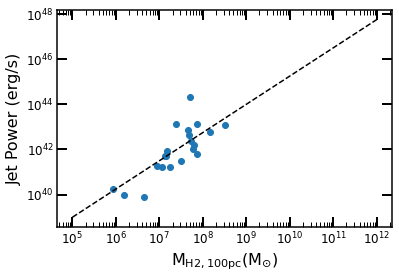

In [10]:
plt.loglog(mass100,power,'o')
plt.xlabel('$M_{H2, 100pc} (M_{\odot})$')
plt.ylabel('Jet Power (erg/s)')
plt.plot(mass,babyk,'--',color='black')

In [11]:
r100=data[['Mass 100pc','Jet Power']]
r100n=r100.dropna()
stats.spearmanr(r100n['Mass 100pc'],r100n['Jet Power'])

SpearmanrResult(correlation=0.751948051948052, pvalue=8.462836509502949e-05)

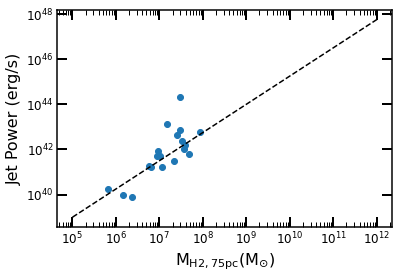

In [12]:
plt.loglog(mass75,power,'o')
plt.xlabel('$M_{H2, 75pc} (M_{\odot})$')
plt.ylabel('Jet Power (erg/s)')
plt.plot(mass,babyk,'--',color='black')

In [13]:
r75=data[['Mass 75pc','Jet Power']]
r75n=r75.dropna()
stats.spearmanr(r75n['Mass 75pc'],r75n['Jet Power'])

SpearmanrResult(correlation=0.7456140350877193, pvalue=0.0002479007969023676)

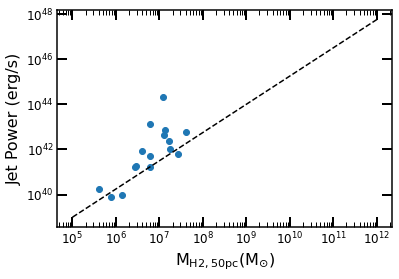

In [14]:
plt.loglog(mass50,power,'o')
plt.xlabel('$M_{H2, 50pc} (M_{\odot})$')
plt.ylabel('Jet Power (erg/s)')
plt.plot(mass,babyk,'--',color='black')

In [15]:
r50=data[['Mass 50pc','Jet Power']]
r50n=r50.dropna()
stats.spearmanr(r50n['Mass 50pc'],r50n['Jet Power'])

SpearmanrResult(correlation=0.7352941176470589, pvalue=0.0011716155350991778)

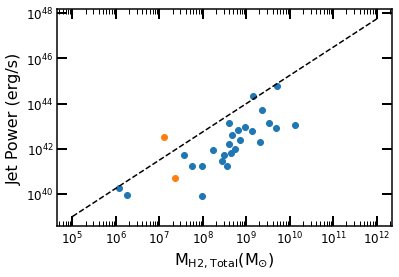

In [17]:
plt.loglog(totalmass,power,'o')
plt.loglog(babykmass,babykpower,'o')
plt.xlabel('$M_{H2, Total} (M_{\odot})$')
plt.ylabel('Jet Power (erg/s)')
plt.plot(mass,babyk,'--',color='black')

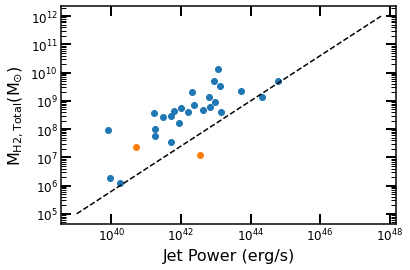

In [19]:
plt.loglog(power,totalmass,'o')
plt.loglog(babykpower,babykmass,'o')
plt.ylabel('$M_{H2, Total} (M_{\odot})$')
plt.xlabel('Jet Power (erg/s)')
plt.plot(babyk,mass,'--',color='black')